Let's construct the system of equations based on the diagrams of forces below.

$$ F_{1} + F - f_{1} - f_{2} - N_{0x} = M_{1}a_{1} $$

$$ T - f_{2} = M_{2}a_{2} $$

$$ -F_{1} = M_{3}a_{3x} $$

$$ f_{3} + T - M_{3}g = M_{3}a_{3y} $$

$$ N_{0x} - T = M_{0}a_{0} = 0 $$

Constraints(the derivation can be found in the solution of the quiz):
$$ a_{1} - a_{2} - a_{3y} = 0 $$
$$ a_{1} = a_{3x} $$

<img src="fd.png">

Let's note that
$$ f_{1} = \mu_{1}N_{1} $$
$$ f_{2} = \mu_{2}N_{2} $$
$$ f_{3} = \mu_{3}F_{1} $$
are forces emerged because of friction.
Where
$$ N_{1} = M_{1}g + N_{2} + N_{0y}$$
$$ N_{2} = M_{2}g $$
$$ N_{0y} = T\sqrt{2}/2 $$ from the diagram of M0


From the system of equations above, we can find $ x_{1}(t), x_{2}(t), y_{3}(t)$. Having the mentioned functions. We will be able to calculate their values at a given time $t$.

IMPORTANT NOTE: After several changes, it is important to say that the pictures of my calculations are not valid anymore. The corresponding changes have been made and the new system was computed, which can be seen below.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [503]:
M1 = 1
M2 = 1
M3 = 2
mu1 = 0.9
mu2 = 0.6
mu3 = 0.1
g = 10

In [504]:
# The system of the linear equations describe din the beginning is reduced to A*[a1, a2]^T = b, and presented below
# with corresponding A and b
def compute_accelerations(F):
    A = np.array([[(M1 - M3), M2 + mu1*M2/(np.sqrt(2))], [mu3*M3 - M3, M2 + M3]])
    b = np.array([[F - mu1*g*(M1+M2+mu2*M2/(np.sqrt(2))), M3*g - M2*mu2*g]])
    a = np.linalg.inv(A).dot(b.T)
    a = np.squeeze(a)
    a1 = [a[0], 0]
    a2 = [a[1], 0]
    a3 = [a1[0], a1[0] - a2[0]]
    return a1, a2, a3
    

In [505]:
# Just a random example of t and F, it should be changed by the data on which the program should work
t = np.linspace(1, 20, 30)
F = np.random.random(30)*(-600) + 300

In [506]:
v1 = 0; v2 = 0; v3 = 0
x1 = [0, 0]
x2 = [0, 0]
x3 = [0, 0]

In [507]:
positions = []
for i in range(len(t)):
    a1, a2, a3 = compute_accelerations(F[i])
    x1[0] += v1*t[i] + a1[0]*(t[i]**2)/2
    v1 += a1[0]*t[i]
    x2[0] += x1[0] + v2*t[i] + a2[0]*(t[i]**2)/2
    v2 += a2[0]*t[i]
    x3[0] = x1[0]
    x3[1] += v3*t[i] + a3[1]*(t[i]**2)/2
    v3 += a3[1]*t[i]
    positions.append([x1.copy(), x2.copy(), x3.copy()])

In [508]:
positions = np.array(positions)

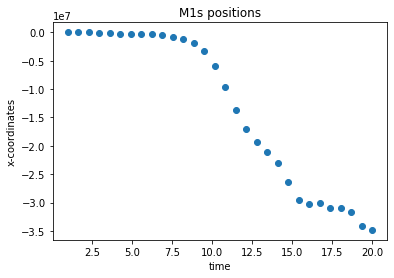

In [509]:
x1s = positions[:,0,:]

x1s_x = x1s[:, 0]
x1s_y = x1s[:, 1]

plt.scatter(t, x1s_x)
plt.title('M1s positions')
plt.xlabel('time')
plt.ylabel('x-coordinates')

Text(0, 0.5, 'x-coordinates')

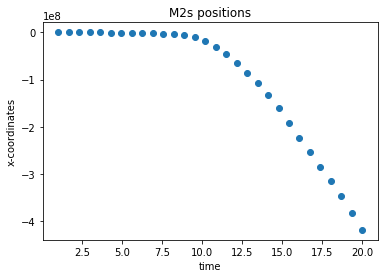

In [510]:
x1s = positions[:,1,:]

x1s_x = x1s[:, 0]
x1s_y = x1s[:, 1]

plt.scatter(t, x1s_x)
plt.title('M2s positions')
plt.xlabel('time')
plt.ylabel('x-coordinates')

Text(0, 0.5, 'x-coordinates')

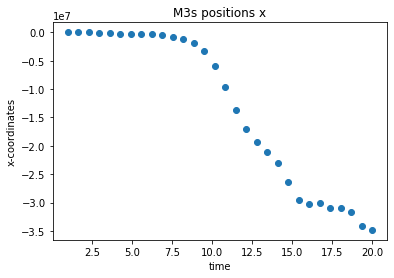

In [511]:
x1s = positions[:,2,:]

x1s_x = x1s[:, 0]
x1s_y = x1s[:, 1]

plt.scatter(t, x1s_x)
plt.title('M3s positions x')
plt.xlabel('time')
plt.ylabel('x-coordinates')

Text(0, 0.5, 'y-coordinates')

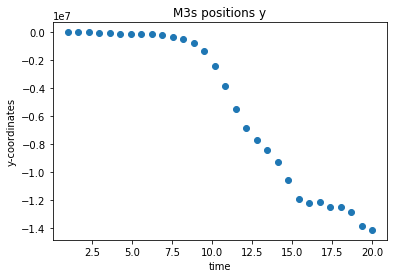

In [512]:
plt.scatter(t, x1s_y)
plt.title('M3s positions y')
plt.xlabel('time')
plt.ylabel('y-coordinates')

# Conclusion-report

#### What was wron in the first submission?

Let me explain the errors of my first submission in couple of words. In the first submission I did not take into consideration the external force F. It was not included in the system of linear equations, therefore there were some inconsistencies. Moreover some forces were missing like from my diagram and system of the equations. In this version, all missing parts are added. Moreover, the graphs drawn were not correct and the range in which F was generated was not corresponding to the specifications in the formulation of the problem. These are changed, too.

#### Some interesting results

From the results above we can see that tweaking the parameters of masses and/or friction coefficients can change the behavior of objects. There are several ineresting cases I've encountered during experimenting with the code. The above presented graphs are for the case when (see plot case1.png for M1's plot of this case)

M1 = 10
M2 = 4
M3 = 2
mu1 = 0.9
mu2 = 0.5
mu3 = 0.1
g = 10
and F is positive at each timestamp t.

More particularly F = [ 64.92598801, 248.42600138,  16.73132729, 246.8873573 ,
                       134.14449981,  93.57422599,  65.24263241, 275.98608286,
                        53.58007021,  41.41405529,  97.14903806, 162.76453976,
                       170.83738211, 274.25409243,  88.55554165,  41.39411493,
                        82.94529418, 253.77365527, 193.73564967,  88.26112618,
                       197.48707232,  64.49265544, 176.38774461,  37.83189414,
                       221.59350998,  33.58515471, 203.10447009, 273.02788675,
                        82.78706555, 168.89017043]
                        
Very interestingly we see some oscillations in movement of M1. However, in the graph of movement of M2 we see a decreasing tendency, so M2 does not oscillate.

Another example is (see case2.png for M1's plot for this case)

M1 = 20
M2 = 8
M3 = 5
mu1 = 0.7
mu2 = 0.6
mu3 = 0.2
g = 10
The values of F are random 
In this case we see that the objects move to the left, since the x coordinates are negative and decrease.


In case 3 (see case3.png) is what we get when masses of the objects are relatively small and close to each other.

M1 = 1
M2 = 1
M3 = 2
mu1 = 0.9
mu2 = 0.6
mu3 = 0.1
g = 10
For random F

So, we can conclide that masses, friction coefficients ad force applied at each timestamp can drastically change the movement of the objects.